C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [11:34:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7005347593582888
✅ AUC: 0.658999827009572
✅ Confusion Matrix:
 [[347  30]
 [138  46]]


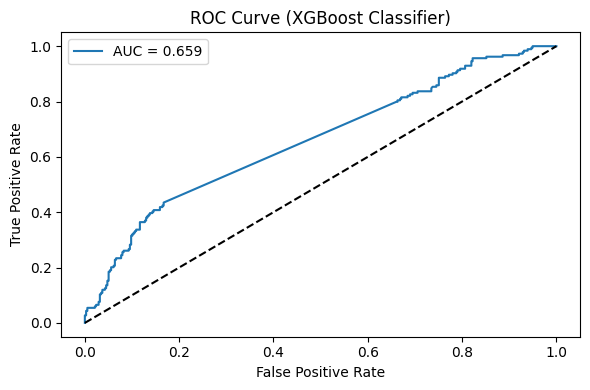

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb

# 1. 데이터 불러오기
df = pd.read_excel("CACS_model_ready_imputed.xlsx")

# 2. 이진 목표 변수 생성 (CACS ≥ 100)
df["CACS_binary"] = (df["CACS"] >= 100).astype(int)

# 3. X, y 분리
X = df.drop(columns=["CACS", "CACS_binary"])
y = df["CACS_binary"]

# 4. 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. XGBoost 분류 모델 학습
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ AUC:", roc_auc_score(y_test, y_proba))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost Classifier)")
plt.legend()
plt.tight_layout()
plt.show()
